### Is it possible to identify the type of crop grown from the band and ndvi readings?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score


### Tests:
- SVM, Logistic Regression and Random Forest....RF gave best results.
- Scaled vrs unscaled data (StandardScaler used for SVM and Logreg).
- Upclaed imbalanced data.
- Vary n_estimator for Random Forest

In [84]:
data = pd.read_csv('training_farms.csv')

In [85]:
data.describe()

,B1,B10,B11,B2,B3,B4,B5,B6,B7,B8,B9,BQA,CID,NDVI,.geo
count,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,0.0
mean,0.106246,300.207644,299.515924,0.086969,0.083909,0.056728,0.456091,0.172783,0.078494,0.071790,0.001561,20507.008047,5.948610,0.770239,NaN
std,0.006697,3.972131,4.175493,0.007508,0.010224,0.014802,0.082971,0.024074,0.018733,0.012715,0.001584,11.612388,2.108653,0.082804,NaN
min,0.090428,285.348300,283.500600,0.069740,0.058633,0.032402,0.187322,0.085857,0.040083,0.046852,0.000554,20480.000000,1.000000,0.325403,NaN
25%,0.101773,297.717485,296.889788,0.081924,0.077298,0.046658,0.396695,0.157475,0.066479,0.063583,0.001057,20512.000000,4.000000,0.734550,NaN
50%,0.104833,300.112530,299.202200,0.085381,0.082414,0.053185,0.452584,0.171602,0.074566,0.069034,0.001194,20512.000000,6.000000,0.789321,NaN
75%,0.109396,302.715103,302.278382,0.090327,0.088724,0.062213,0.516175,0.186545,0.085936,0.076516,0.001400,20512.000000,8.000000,0.828141,NaN
max,0.198023,316.240880,314.324300,0.190193,0.189639,0.188481,0.802882,0.301680,0.215608,0.216805,0.017344,20512.000000,9.000000,0.883861,NaN


In [81]:
#sns.pairplot(data.drop(['system:index', '.geo', 'BQA','B1','B2','B3','B4','B10','B11'],axis=1), hue='CID');

In [82]:
#sns.pairplot(data_plt.drop(['B5','B6','B7','B8','B9'],axis=1), hue='CID');

In [83]:
#sns.pairplot(data)

In [136]:
y = data2['CID']
X = data2.drop(['CID','system:index','system:index','.geo'], axis=1)

In [138]:
X.columns

Index(['B1', 'B10', 'B10_1', 'B11', 'B11_1', 'B1_1', 'B2', 'B2_1', 'B3',
       'B3_1', 'B4', 'B4_1', 'B5', 'B5_1', 'B6', 'B6_1', 'B7', 'B7_1', 'B8',
       'B8_1', 'B9', 'B9_1', 'BQA', 'BQA_1', 'NDVI', 'NDVI_1',
       'system:time_start', 'system:time_start_1'],
      dtype='object')

In [139]:
# Split data and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)

In [89]:
# Scale inputs
scaler = StandardScaler()
scaler.fit(X_train)
Xn_train = scaler.transform(X_train)
Xn_test = scaler.transform(X_test)

In [90]:
# Single Vector Machine Classification
svm_cls = SVC(kernel = 'linear', gamma='auto',C = 0.01, class_weight='balanced', probability=True)
svm_cls.fit(Xn_train, y_train) 
svm_predict = svm_cls.predict(Xn_test) 

In [91]:
# SVM Model Evaluation

#f1 = f1_score(y_test, svm_predict, )
cr = classification_report(y_test, svm_predict, labels = [1,2,3,4,5,6,7,8,9], zero_division=0,
                          target_names=['cotton','dates','grass','alfalfa', 'maize', 'pecan',
                                       'vacant', 'vineyard', 'vineyard+pecan'])
print(cr)
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predict) 
print(f'Confustion_Matrix: \n{cm}')


                precision    recall  f1-score   support

        cotton       0.22      0.53      0.31        75
         dates       0.00      0.00      0.00         2
         grass       0.06      0.02      0.04        41
       alfalfa       0.51      0.60      0.55       304
         maize       0.45      0.27      0.34       168
         pecan       0.23      0.22      0.23       117
        vacant       0.28      0.30      0.29       158
      vineyard       0.45      0.05      0.10       451
vineyard+pecan       0.09      0.51      0.15        51

      accuracy                           0.29      1367
     macro avg       0.25      0.28      0.22      1367
  weighted avg       0.39      0.29      0.27      1367

Confustion_Matrix: 
[[ 40   3   0   9   4   2   4   2  11]
 [  0   0   0   0   0   0   2   0   0]
 [  9   7   1  11   2   2   5   2   2]
 [ 30  10   4 182  26  10  23   6  13]
 [ 26   5   2  54  45   8   7   2  19]
 [  4   7   1  25   8  26  24   5  17]
 [ 19   9   3  

In [99]:
unique, counts = np.unique(y_train, return_counts=True)
print('actual y_train values:', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print('actual y_test values:', dict(zip(unique, counts)))

unique, counts = np.unique(svm_predict, return_counts=True)
print('predicted svm values:', dict(zip(unique, counts)))

actual y_train values: {1: 226, 2: 5, 3: 124, 4: 910, 5: 505, 6: 353, 7: 472, 8: 1355, 9: 151}
actual y_test values: {1: 75, 2: 2, 3: 41, 4: 304, 5: 168, 6: 117, 7: 158, 8: 451, 9: 51}
predicted svm values: {1: 180, 2: 85, 3: 16, 4: 359, 5: 100, 6: 113, 7: 170, 8: 53, 9: 291}


### Logistic Regression:

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:

logreg = LogisticRegression(max_iter=1000, solver='liblinear',C=0.1, class_weight='balanced')
logreg.fit(Xn_train, y_train) 
logreg_predict = logreg.predict(Xn_test) 

In [107]:
cr_logreg = classification_report(y_test, logreg_predict, labels = [1,2,3,4,5,6,7,8,9], zero_division=0,
                          target_names=['cotton','dates','grass','alfalfa', 'maize', 'pecan',
                                       'vacant', 'vineyard', 'vineyard+pecan'])
print(cr_logreg)
# creating a confusion matrix 
cm_logreg = confusion_matrix(y_test, logreg_predict) 
print(f'Confustion_Matrix: \n{cm_logreg}')

                precision    recall  f1-score   support

        cotton       0.31      0.53      0.39        75
         dates       0.00      0.00      0.00         2
         grass       0.00      0.00      0.00        41
       alfalfa       0.51      0.62      0.56       304
         maize       0.44      0.26      0.33       168
         pecan       0.33      0.28      0.31       117
        vacant       0.33      0.20      0.25       158
      vineyard       0.61      0.72      0.66       451
vineyard+pecan       0.25      0.02      0.04        51

      accuracy                           0.49      1367
     macro avg       0.31      0.29      0.28      1367
  weighted avg       0.46      0.49      0.46      1367

Confustion_Matrix: 
[[ 40   0   0  11   4   2   4  14   0]
 [  0   0   0   0   0   0   2   0   0]
 [  6   5   0  12   3   2   0  13   0]
 [ 22   4   0 189  24  14  15  35   1]
 [ 21   2   0  55  44  12   5  29   0]
 [  2   4   0  22  11  33  12  33   0]
 [ 16  10   0  

### Random Forest: 

In [30]:
from sklearn.ensemble import RandomForestClassifier

### tests

In [140]:
hyper_table_rf_landsat =[]

estimators = [25, 50, 100, 150, 200, 250, 300, 350, 400]

for estimator in estimators:
    
    hyper_param = {}
    
    rf = RandomForestClassifier(n_estimators = estimator)
    
    hyper_param  ['model'] = rf.__class__.__name__
    hyper_param['estimator']= estimator
    
    # fit and predict
    rf.fit(X_train, y_train) 
    rf_predict = rf.predict(X_test)
    rf_train_predict = rf.predict(X_train)
    rf_predict_proba = rf.predict_proba(X_test)
    
    # Calculate f1 score
    hyper_param['f1score_wghtd'] = f1_score(y_test, rf_predict, average='weighted')
    
    hyper_param['accuracy'] = accuracy_score(y_test, rf_predict)
    #hyper_param['accuracy_train'] = accuracy_score(y_train, rf_train_predict)
    
    # Calculate log loss
    logloss = log_loss(y_test, rf_predict_proba)
    hyper_param['log_loss'] = logloss
    
    hyper_table_rf_landsat.append(hyper_param)

### Landsat_Tuned tests:

In [141]:
hyper_table_rf_landsat = pd.DataFrame(hyper_table_rf_landsat)
hyper_table_rf_landsat

,model,estimator,f1score_wghtd,accuracy,log_loss
0,RandomForestClassifier,25,0.635725,0.655087,1.640508
1,RandomForestClassifier,50,0.653414,0.670802,1.213517
2,RandomForestClassifier,100,0.648023,0.668321,1.111177
3,RandomForestClassifier,150,0.651171,0.670802,1.066689
4,RandomForestClassifier,200,0.650941,0.670802,1.034333
5,RandomForestClassifier,250,0.649839,0.669975,1.029158
6,RandomForestClassifier,300,0.648969,0.670802,1.031020
7,RandomForestClassifier,350,0.652406,0.673284,1.005897
8,RandomForestClassifier,400,0.650145,0.669975,1.005974


Text(0, 0.5, 'log_loss score')

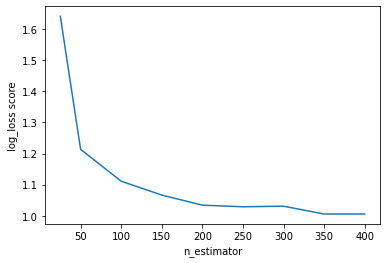

In [142]:
plt.plot(hyper_table_rf_landsat['estimator'], hyper_table_rf_landsat['log_loss'])
plt.xlabel('n_estimator')
plt.ylabel('log_loss score')
#plt.ylim([1, 3])

In [143]:
cr_rf_landsat = classification_report(y_test, rf_predict, labels = [1,2,3,4,5,6,7,8,9], zero_division=0,
                          target_names=['cotton','dates','grass','alfalfa', 'maize', 'pecan',
                                       'vacant', 'vineyard', 'vineyard+pecan'])
print(cr_rf_landsat)
# creating a confusion matrix 
cm_rf_landsat = confusion_matrix(y_test, rf_predict) 
print(f'Confustion_Matrix: \n{cm_rf}')

                precision    recall  f1-score   support

        cotton       0.87      0.48      0.62        69
         dates       0.00      0.00      0.00         1
         grass       0.62      0.20      0.30        41
       alfalfa       0.74      0.77      0.76       270
         maize       0.81      0.60      0.69       135
         pecan       0.71      0.50      0.59       111
        vacant       0.56      0.52      0.54       143
      vineyard       0.61      0.88      0.72       392
vineyard+pecan       0.80      0.09      0.15        47

      accuracy                           0.67      1209
     macro avg       0.64      0.45      0.49      1209
  weighted avg       0.69      0.67      0.65      1209

Confustion_Matrix: 
[[ 25   0   0  12   2   3   3  30   0]
 [  0   0   0   1   0   0   1   0   0]
 [  1   0   0  17   3   1   6  13   0]
 [  0   0   1 211  23   3   7  59   0]
 [  2   0   1  50  60   3   6  46   0]
 [  1   0   0  24   8  25   6  53   0]
 [  2   0   0  

### Landsat Tests

In [124]:
hyper_table_rf = pd.DataFrame(hyper_table_rf)
hyper_table_rf

,model,estimator,f1score_wghtd,accuracy,log_loss
0,RandomForestClassifier,25,0.489714,0.529627,3.330565
1,RandomForestClassifier,50,0.492057,0.540600,2.311075
2,RandomForestClassifier,100,0.491559,0.538405,1.755296
3,RandomForestClassifier,150,0.500757,0.546452,1.639506
4,RandomForestClassifier,200,0.493656,0.541331,1.585329
5,RandomForestClassifier,250,0.503646,0.549378,1.473921
6,RandomForestClassifier,300,0.499195,0.547184,1.485343
7,RandomForestClassifier,350,0.501166,0.547184,1.436178
8,RandomForestClassifier,400,0.499661,0.547184,1.476038


Text(0, 0.5, 'log_loss score')

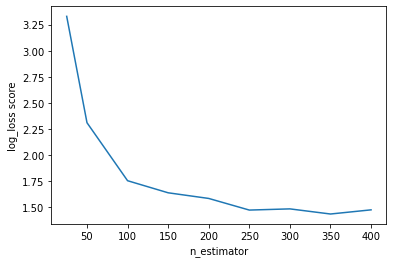

In [125]:
plt.plot(hyper_table_rf['estimator'], hyper_table_rf['log_loss'])
plt.xlabel('n_estimator')
plt.ylabel('log_loss score')
#plt.ylim([1, 3])

In [126]:
cr_rf = classification_report(y_test, rf_predict, labels = [1,2,3,4,5,6,7,8,9], zero_division=0,
                          target_names=['cotton','dates','grass','alfalfa', 'maize', 'pecan',
                                       'vacant', 'vineyard', 'vineyard+pecan'])
print(cr_rf)
# creating a confusion matrix 
cm_rf = confusion_matrix(y_test, rf_predict) 
print(f'Confustion_Matrix: \n{cm_rf}')

                precision    recall  f1-score   support

        cotton       0.74      0.33      0.46        75
         dates       0.00      0.00      0.00         2
         grass       0.00      0.00      0.00        41
       alfalfa       0.53      0.69      0.60       304
         maize       0.57      0.36      0.44       168
         pecan       0.51      0.21      0.30       117
        vacant       0.47      0.23      0.31       158
      vineyard       0.56      0.86      0.68       451
vineyard+pecan       0.33      0.02      0.04        51

      accuracy                           0.55      1367
     macro avg       0.41      0.30      0.31      1367
  weighted avg       0.52      0.55      0.50      1367

Confustion_Matrix: 
[[ 25   0   0  12   2   3   3  30   0]
 [  0   0   0   1   0   0   1   0   0]
 [  1   0   0  17   3   1   6  13   0]
 [  0   0   1 211  23   3   7  59   0]
 [  2   0   1  50  60   3   6  46   0]
 [  1   0   0  24   8  25   6  53   0]
 [  2   0   0  

In [237]:
logloss = log_loss(y_test, rf_predict_proba)
logloss

1.45277676198814

In [49]:
rf_predict_proba_df = pd.DataFrame(rf_predict_proba, 
             columns= ['crop_prob_1', 'crop_prob_2', "crop_prob_3",'crop_prob_4', 'crop_prob_5',
                      'crop_prob_6', 'crop_prob_7', 'crop_prob_8', 'crop_prob_9'])
rf_predict_proba_df

,crop_prob_1,crop_prob_2,crop_prob_3,crop_prob_4,crop_prob_5,crop_prob_6,crop_prob_7,crop_prob_8,crop_prob_9
0,0.004,0.120,0.040,0.024,0.064,0.048,0.164,0.516,0.020
1,0.314,0.004,0.020,0.064,0.120,0.066,0.128,0.276,0.008
2,0.036,0.000,0.016,0.256,0.136,0.096,0.064,0.344,0.052
3,0.012,0.000,0.012,0.004,0.020,0.000,0.016,0.808,0.128
4,0.000,0.000,0.004,0.128,0.032,0.084,0.688,0.060,0.004
...,...,...,...,...,...,...,...,...,...
1362,0.068,0.000,0.032,0.024,0.084,0.064,0.168,0.508,0.052
1363,0.036,0.000,0.036,0.188,0.556,0.096,0.040,0.048,0.000
1364,0.000,0.000,0.004,0.020,0.012,0.000,0.932,0.028,0.004
1365,0.012,0.000,0.004,0.024,0.056,0.008,0.024,0.480,0.392


In [118]:
cr_rf = classification_report(y_test, rf_predict, labels = [1,2,3,4,5,6,7,8,9], zero_division=0,
                          target_names=['cotton','dates','grass','alfalfa', 'maize', 'pecan',
                                       'vacant', 'vineyard', 'vineyard+pecan'])
print(cr_rf)
# creating a confusion matrix 
cm_rf = confusion_matrix(y_test, rf_predict) 
print(f'Confustion_Matrix: \n{cm_rf}')

                precision    recall  f1-score   support

        cotton       0.83      0.85      0.84       478
         dates       0.99      1.00      0.99       467
         grass       0.82      0.89      0.85       462
       alfalfa       0.68      0.66      0.67       453
         maize       0.75      0.74      0.75       433
         pecan       0.78      0.71      0.75       469
        vacant       0.72      0.70      0.71       447
      vineyard       0.56      0.47      0.51       417
vineyard+pecan       0.77      0.92      0.84       438

      accuracy                           0.77      4064
     macro avg       0.77      0.77      0.77      4064
  weighted avg       0.77      0.77      0.77      4064

Confustion_Matrix: 
[[404   0  10  20  10  10   8  10   6]
 [  0 467   0   0   0   0   0   0   0]
 [  3   1 409   9   5   6   3  18   8]
 [ 22   0  17 300  39  19  25  22   9]
 [  9   0   7  29 322  19  14  20  13]
 [ 14   1   8  24  24 334  15  33  16]
 [ 14   1  22  

In [219]:
!pip install imbalanced-learn

In [222]:
import imblearn

In [128]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [129]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [130]:
data2 = pd.read_csv('Landsat_training_farms_Tuned.csv')

In [131]:
data2.head()

,system:index,B1,B10,B10_1,B11,B11_1,B1_1,B2,B2_1,B3,...,B9,B9_1,BQA,BQA_1,CID,NDVI,NDVI_1,system:time_start,system:time_start_1,.geo
0,000000000000000008fc_0,0.111851,296.73923,288.53226,297.20410,285.20420,0.136913,0.094519,0.119773,0.094993,...,0.001115,0.007478,20512,20480,4,0.735338,0.023107,1.490430e+12,1.493195e+12,NaN
1,000000000000000008fc_1,0.103687,296.81390,288.74982,296.85840,284.73492,0.134550,0.082286,0.115794,0.080503,...,0.001031,0.009512,20512,20480,4,0.848221,0.010605,1.490430e+12,1.493195e+12,NaN
2,000000000000000008fc_2,0.106557,297.66074,289.14752,297.64413,285.29352,0.132486,0.085658,0.113311,0.082788,...,0.001338,0.008645,20512,20480,4,0.807413,0.010418,1.490430e+12,1.493195e+12,NaN
3,000000000000000008fe_0,0.111099,296.90775,289.67984,297.09460,287.22427,0.124948,0.092959,0.105713,0.090813,...,0.001142,0.004128,20480,20480,4,0.751805,0.077353,1.490430e+12,1.493195e+12,NaN
4,000000000000000008ff_0,0.116059,297.36154,290.48750,297.88736,288.10630,0.123452,0.097779,0.104517,0.098086,...,0.001170,0.002782,20512,20480,4,0.683049,0.111133,1.490430e+12,1.493195e+12,NaN


### Upscale tests

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
smt = SMOTE(random_state = 123)
X_res, y_res = smt.fit_sample(X,y)

In [110]:
X_res.shape, y_res.shape

((16254, 13), (16254,))

In [133]:
from collections import Counter

In [112]:
Counter(y_res)

Counter({4: 1806,
         6: 1806,
         7: 1806,
         8: 1806,
         3: 1806,
         5: 1806,
         9: 1806,
         1: 1806,
         2: 1806})

In [77]:
Counter(y)

Counter({4: 1214,
         6: 470,
         7: 630,
         8: 1806,
         3: 165,
         5: 673,
         9: 202,
         1: 301,
         2: 7})

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=123)

In [120]:
rfs = RandomForestClassifier(n_estimators = 50)
rfs.fit(X_train, y_train) 
rfs_predict = rfs.predict(X_test) 

In [121]:
#f1 = f1_score(y_test, svm_predict, )
cr = classification_report(y_test, rfs_predict, labels = [1,2,3,4,5,6,7,8,9], zero_division=0,
                          target_names=['cotton','dates','grass','alfalfa', 'maize', 'pecan',
                                       'vacant', 'vineyard', 'vineyard+pecan'])
print(cr)
# creating a confusion matrix 
cm = confusion_matrix(y_test, rfs_predict) 
print(f'Confustion_Matrix: \n{cm}')

                precision    recall  f1-score   support

        cotton       0.80      0.83      0.82       478
         dates       0.99      1.00      0.99       467
         grass       0.80      0.88      0.84       462
       alfalfa       0.67      0.66      0.66       453
         maize       0.75      0.73      0.74       433
         pecan       0.77      0.74      0.75       469
        vacant       0.72      0.70      0.71       447
      vineyard       0.56      0.44      0.49       417
vineyard+pecan       0.78      0.90      0.84       438

      accuracy                           0.77      4064
     macro avg       0.76      0.76      0.76      4064
  weighted avg       0.76      0.77      0.76      4064

Confustion_Matrix: 
[[395   0   9  20  17  13   8  10   6]
 [  0 467   0   0   0   0   0   0   0]
 [  2   1 408  18   5   3   4  14   7]
 [ 30   0  20 297  35  27  21  18   5]
 [ 10   0  13  28 318  19  13  19  13]
 [ 13   1  12  20  20 346  12  31  14]
 [ 15   1  23  

### Conclusions:
Use RandomForest (n_estimator = 200), no StandardScaling, no Upscaling, but stratify y when test_train_splitting data. 